In [8]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

import NaiveDE
import SpatialDE

Populating the interactive namespace from numpy and matplotlib


In [9]:
counts = pd.read_csv('Data/Brain1_treated_hp_tissue.tsv', sep='\t',index_col=0)
counts = counts.T[counts.sum(0) >= 3].T  # Filter practically unobserved genes
print(counts.shape)
counts.iloc[:5, :5]

(58, 10947)


,ENSMUSG00000102331,ENSMUSG00000098104,ENSMUSG00000033845,ENSMUSG00000025903,ENSMUSG00000033813
18.99x18.1,0.0,0.0,0.0,0.0,0.0
18.99x19.11,0.0,0.0,0.0,0.0,0.0
18.99x19.99,0.0,0.0,0.0,3.0,0.0
20.01x17.08,0.0,0.0,0.0,0.0,0.0
20.01x18.1,1.0,0.0,0.0,0.0,0.0


In [10]:
sample_info = pd.DataFrame(0, index = counts.index, columns = ['x','y','total_counts'])
sample_info.loc[:,'x'] = [float(item.split('x')[0]) for item in sample_info.index]
sample_info.loc[:,'y'] = [float(item.split('x')[1]) for item in sample_info.index]
sample_info.loc[:,'total_counts'] = counts.sum(axis=1)
sample_info.head(5)

,x,y,total_counts
18.99x18.1,18.99,18.10,3500.0
18.99x19.11,18.99,19.11,4287.0
18.99x19.99,18.99,19.99,9356.0
20.01x17.08,20.01,17.08,7184.0
20.01x18.1,20.01,18.10,10844.0


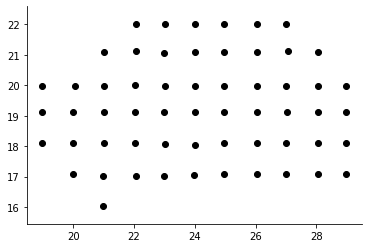

In [11]:
figsize(6, 4)
plt.scatter(sample_info['x'], sample_info['y'], c='k');
plt.axis('equal');

In [12]:
norm_expr = NaiveDE.stabilize(counts.T).T
resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T

In [13]:
sample_resid_expr = resid_expr.sample(n=len(counts.columns), axis=1, random_state=1)

X = sample_info[['x', 'y']]
sample_resid_expr.head()
results = SpatialDE.run(X, sample_resid_expr)

In [15]:
results.head().T

,0,1,2,3,4
FSV,0.497651,2.05217e-09,0.999954,2.05217e-09,0.999954
M,4,4,4,4,4
g,ENSMUSG00000062563,ENSMUSG00000096768,ENSMUSG00000048142,ENSMUSG00000025400,ENSMUSG00000024900
l,0.425735,0.425735,0.425735,0.425735,0.425735
max_delta,1.00504,4.85165e+08,4.53999e-05,4.85165e+08,4.53999e-05
max_ll,95.3602,-13.6531,48.5629,66.0805,68.5421
max_mu_hat,1.14984,-2.85961,0.935807,1.21819,1.23075
max_s2_t_hat,0.588297,1.70481e-08,0.714674,3.07109e-09,1.22256
model,SE,SE,SE,SE,SE
n,58,58,58,58,58


In [16]:
results.sort_values('qval').head(5)[['g', 'l', 'pval','qval']]

,g,l,pval,qval
9469,ENSMUSG00000047648,1.010424,0.000005,0.031711
9653,ENSMUSG00000035004,1.010424,0.000006,0.031711
10618,ENSMUSG00000041708,2.398107,0.000019,0.057105
10809,ENSMUSG00000098178,3.694460,0.000021,0.057105
10283,ENSMUSG00000064357,1.556633,0.000089,0.097953


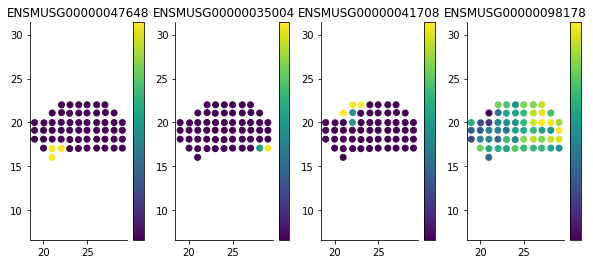

In [19]:
figsize(10, 4)
for i, g in enumerate(['ENSMUSG00000047648', 'ENSMUSG00000035004', 'ENSMUSG00000041708', 'ENSMUSG00000098178']):
    plt.subplot(1, 4, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

In [20]:
results.sort_values('qval').tail(10)[['g', 'l', 'qval']]

,g,l,qval
3646,ENSMUSG00000040591,0.425735,0.94735
3647,ENSMUSG00000031540,0.425735,0.94735
3648,ENSMUSG00000042834,0.425735,0.94735
3649,ENSMUSG00000046613,0.425735,0.94735
3650,ENSMUSG00000074863,0.425735,0.94735
3651,ENSMUSG00000054708,0.425735,0.94735
3652,ENSMUSG00000004451,0.425735,0.94735
3653,ENSMUSG00000028397,0.425735,0.94735
3645,ENSMUSG00000017707,0.425735,0.94735
10946,ENSMUSG00000024873,8.768306,0.94735


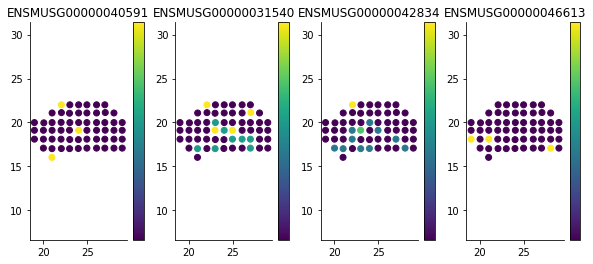

In [22]:
figsize(10, 4)
for i, g in enumerate(['ENSMUSG00000040591', 'ENSMUSG00000031540', 'ENSMUSG00000042834', 'ENSMUSG00000046613']):
    plt.subplot(1, 4, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

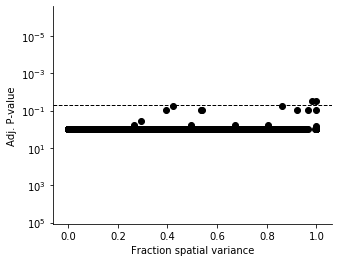

In [23]:
figsize(5, 4)
plt.yscale('log')

plt.scatter(results['FSV'], results['qval'], c='black')

plt.axhline(0.05, c='black', lw=1, ls='--');

plt.gca().invert_yaxis();
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');

In [25]:
sign_results = results.query('qval < 0.05')
sign_results['l'].value_counts()


1.010424    2
Name: l, dtype: int64

In [26]:
histology_results, patterns = SpatialDE.aeh.spatial_patterns(X, resid_expr, sign_results, C=3, l=1.8, verbosity=1)


iter 0, ELBO: -1.34e+07
iter 1, ELBO: -6.95e+06, delta_ELBO: 6.44e+06
iter 2, ELBO: -6.95e+06, delta_ELBO: 2.77e+01
iter 3, ELBO: -6.95e+06, delta_ELBO: 8.16e+00
iter 4, ELBO: -6.95e+06, delta_ELBO: 6.74e-01
iter 5, ELBO: -6.95e+06, delta_ELBO: 5.04e-02
iter 6, ELBO: -6.95e+06, delta_ELBO: 3.96e-03
Converged on iter 6


In [27]:
histology_results.head()


,g,pattern,membership
9469,ENSMUSG00000047648,0,1.0
9653,ENSMUSG00000035004,0,1.0


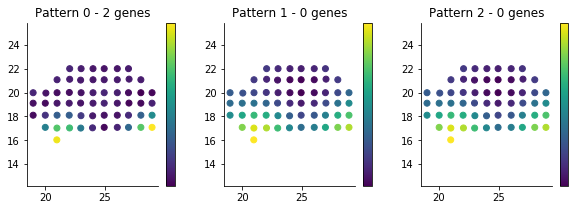

In [28]:
figsize(10, 3)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=patterns[i]);
    plt.axis('equal')
    plt.title('Pattern {} - {} genes'.format(i, histology_results.query('pattern == @i').shape[0] ))
    plt.colorbar(ticks=[]);

In [29]:
for i in histology_results.sort_values('pattern').pattern.unique():
    print('Pattern {}'.format(i))
    print(', '.join(histology_results.query('pattern == @i').sort_values('membership')['g'].tolist()))
    print()

Pattern 0
ENSMUSG00000047648, ENSMUSG00000035004

